## 1990年到2025年度深交所、上交所与北交所上市公司总数数据获取
    - 包含深圳交易所上市公司数量、上海交易所上市公司数量，北交所上市公司数量。深圳交易所上市公司数量包括主板上市公司中小板上市公司创业板上市公司，上海交易所上市公司数量包括主板上市公司数量、科创板上市公司数量。

In [ ]:
import akshare as ak

## 深圳A股列表
sz_list = ak.stock_info_sz_name_code()
print(sz_list.head(2))
#sz_list.to_csv("sz_list.csv", index=False, encoding="utf-8-sig")

## 上海A股列表
sh_list = ak.stock_info_sh_name_code()
print(sh_list.head(2))
#sh_list.to_csv("sh_list.csv", index=False, encoding="utf-8-sig")
sh_list.rename(columns={'证券代码': 'code', '证券简称': 'name', '上市日期': 'list_date'}, inplace=True)
# 获取上交所每个股票的行业信息 运行约要5-8min
industry_data = []
for code in sh_list['code']:
    try:
        company_info = ak.stock_individual_info_em(symbol=code)
        industry = company_info.loc[company_info['item'] == '行业', 'value'].values[0]
        industry_data.append(industry)
    except:
        industry_data.append(None)  # 处理异常情况
sh_list['industry'] = industry_data
# 保存数据到CSV
sh_list.to_csv("sh_list_with_industry.csv", index=False, encoding="utf-8-sig")

## 北交所列表
bj_list = ak.stock_info_bj_name_code()
print(bj_list.head(2))
#bj_list.to_csv("bj_list.csv", index=False, encoding="utf-8-sig")

## 上海证券交易所-终止上市公司
sh_delist = ak.stock_info_sh_delist()
print(sh_delist.head(2))

## 深圳证券交易所-终止上市公司
sz_delist = ak.stock_info_sz_delist()
print(sz_delist.head(2))

   板块    A股代码   A股简称      A股上市日期           A股总股本          A股流通股本   所属行业
0  主板  000001   平安银行  1991-04-03  19,405,918,198  19,405,600,653  J 金融业
1  主板  000002  万  科Ａ  1991-01-29   9,724,196,533   9,716,812,790  K 房地产
     证券代码  证券简称            公司全称        上市日期
0  600000  浦发银行  上海浦东发展银行股份有限公司  1999-11-10
1  600004  白云机场  广州白云国际机场股份有限公司  2003-04-28
     证券代码  证券简称        总股本       流通股本        上市日期   所属行业   地区        报告日期
0  430017  星昊医药  122288200  121417900  2023-05-31  医药制造业  北京市  2025-05-23
1  430047  诺思兰德  274271974  180106427  2020-11-24  医药制造业  北京市  2025-05-23
     公司代码  公司简称        上市日期      暂停上市日期
0  600001  邯郸钢铁  1998-01-22  2009-12-29
1  600002  齐鲁退市  1998-04-08  2006-04-24
Empty DataFrame
Columns: []
Index: []


### 分析深交所1990年至2025年每年上市的公司数量与累计的上市公司数量

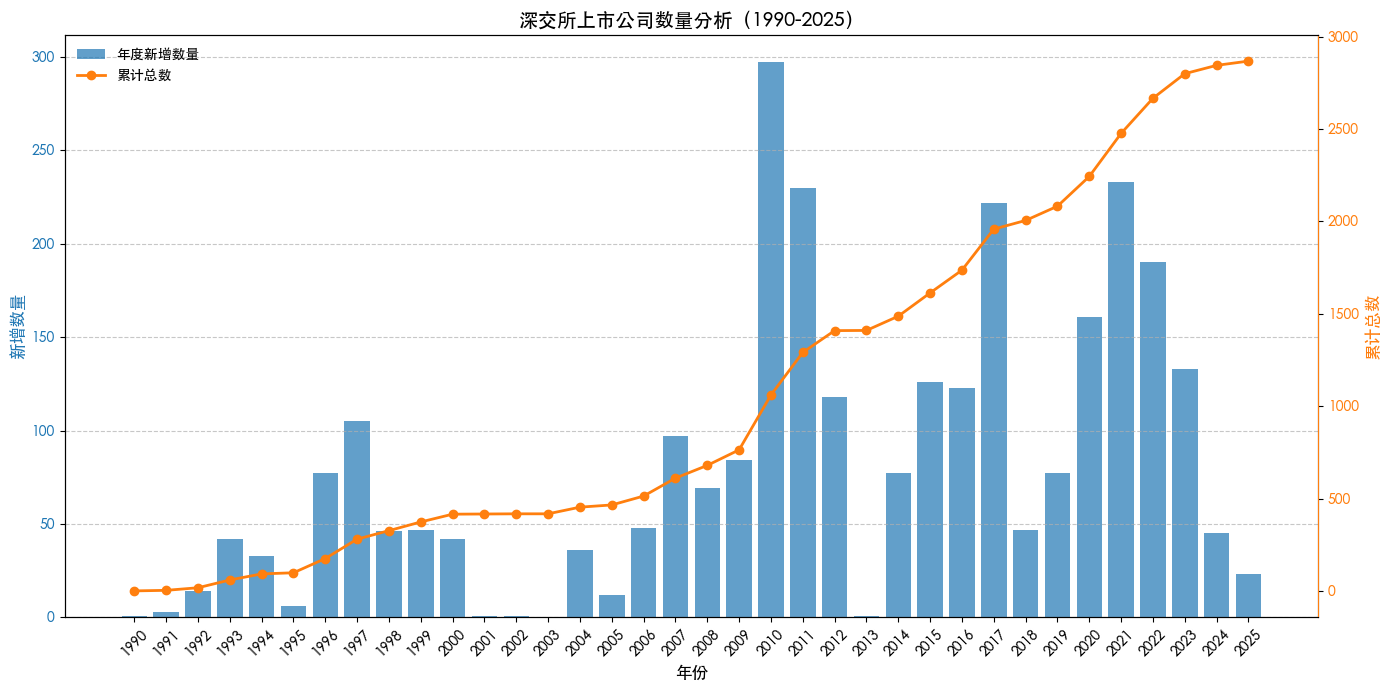

In [21]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

# 设置中文字体支持
plt.rcParams["font.family"] = ["Heiti TC"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 获取深圳A股列表（含上市日期）
sz_list.rename(columns={'A股上市日期': 'list_date'}, inplace=True)

# 转换日期格式并提取年份（处理中文日期格式如"1991年04月03日"）
sz_list['year'] = pd.to_datetime(
    sz_list['list_date'].str.replace('年', '-').str.replace('月', '-').str.replace('日', ''),
    errors='coerce'
).dt.year

# 过滤无效年份
sz_list = sz_list.dropna(subset=['year']).astype({'year': int})

# 统计各年度新增上市公司数量
annual_counts = sz_list.groupby('year').size().reset_index(name='新增数量')

# 填充缺失年份（确保1990-2025连续）
full_years = pd.DataFrame({'year': range(1990, 2026)})
annual_counts = full_years.merge(annual_counts, how='left').fillna(0).astype({'新增数量': int})

# 计算累计总数
annual_counts['累计总数'] = annual_counts['新增数量'].cumsum()

# 保存数据到CSV
annual_counts.to_csv("sz_annual_listings.csv", index=False)

# 创建画布和左Y轴
fig, ax1 = plt.subplots(figsize=(14, 7))

# 绘制左Y轴柱状图（年度新增数量）
bar = ax1.bar(
    x=annual_counts['year'],
    height=annual_counts['新增数量'],
    color='#1f77b4',
    alpha=0.7,
    label='年度新增数量'
)

# 设置左Y轴样式
ax1.set_title('深交所上市公司数量分析（1990-2025）', fontsize=14)
ax1.set_xlabel('年份', fontsize=12)
ax1.set_ylabel('新增数量', fontsize=12, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticks(annual_counts['year']) 
ax1.set_xticklabels(annual_counts['year'], rotation=45)

# 创建右Y轴
ax2 = ax1.twinx()

# 绘制右Y轴折线图（累计总数）
line, = ax2.plot(
    annual_counts['year'],
    annual_counts['累计总数'],
    color='#ff7f0e',
    marker='o',
    linewidth=2,
    markersize=6,
    label='累计总数'
)

# 设置右Y轴样式
ax2.set_ylabel('累计总数', fontsize=12, color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')
ax2.spines['right'].set_color('#ff7f0e')  # 设置右轴颜色与折线一致

# 合并图例（处理不同图表类型）
legend_handles = [
    Rectangle((0,0), 1, 1, facecolor='#1f77b4', alpha=0.7),
    Line2D([0], [0], color='#ff7f0e', marker='o', linewidth=2)
]
ax1.legend(
    handles=legend_handles,
    labels=['年度新增数量', '累计总数'],
    loc='upper left',
    fontsize=10,
    frameon=False
)

# 调整布局并显示
plt.tight_layout()
plt.show()

### 分析上交所1990年至2025年每年上市的公司数量与累计的上市公司数量

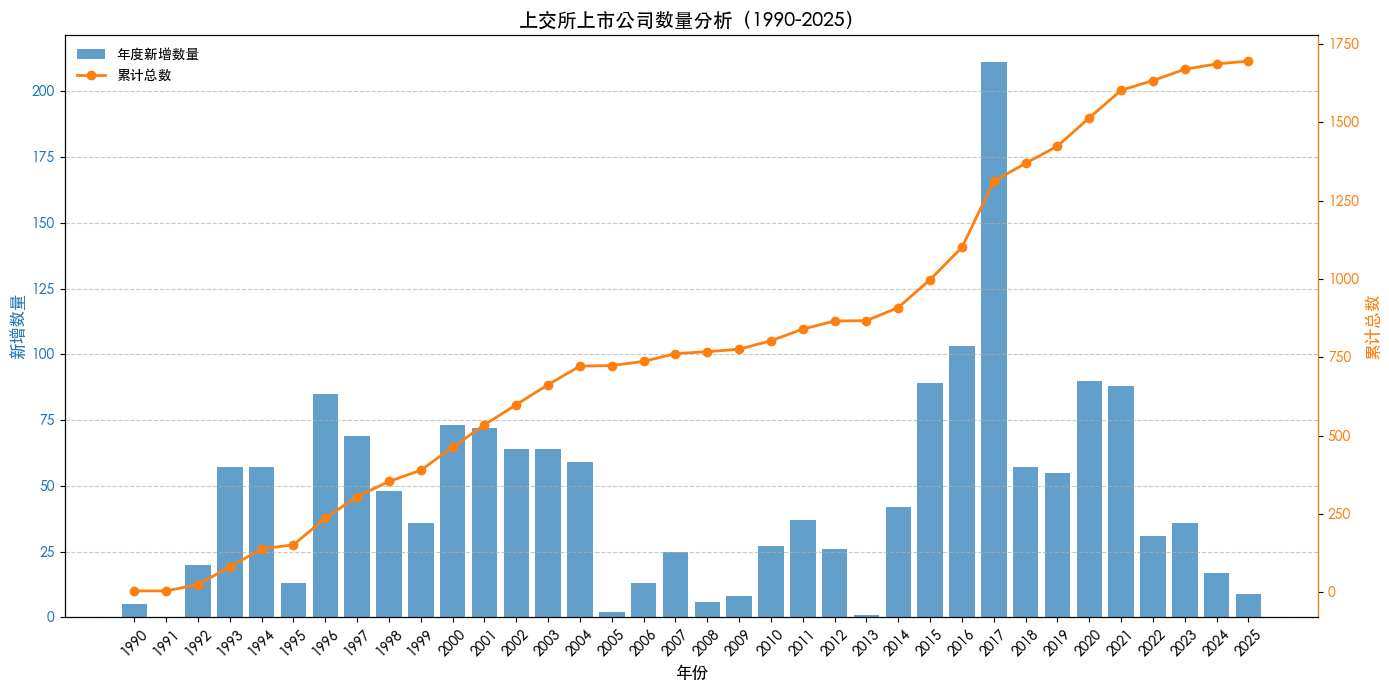

In [79]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

# 设置中文字体支持
plt.rcParams["font.family"] = ["Heiti TC"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 获取深圳A股列表（含上市日期）
sh_list.rename(columns={'上市日期': 'list_date'}, inplace=True)

# 转换日期格式并提取年份（处理中文日期格式如"1991年04月03日"）
sh_list['year'] = pd.to_datetime(
    sh_list['list_date'],
    errors='coerce'
).dt.year

# 过滤无效年份
sh_list = sh_list.dropna(subset=['year']).astype({'year': int})

# 统计各年度新增上市公司数量
annual_counts = sh_list.groupby('year').size().reset_index(name='新增数量')

# 填充缺失年份（确保1990-2025连续）
full_years = pd.DataFrame({'year': range(1990, 2026)})
annual_counts = full_years.merge(annual_counts, how='left').fillna(0).astype({'新增数量': int})

# 计算累计总数
annual_counts['累计总数'] = annual_counts['新增数量'].cumsum()

# 保存数据到CSV
annual_counts.to_csv("sh_annual_listings.csv", index=False)

# 创建画布和左Y轴
fig, ax1 = plt.subplots(figsize=(14, 7))

# 绘制左Y轴柱状图（年度新增数量）
bar = ax1.bar(
    x=annual_counts['year'],
    height=annual_counts['新增数量'],
    color='#1f77b4',
    alpha=0.7,
    label='年度新增数量'
)

# 设置左Y轴样式
ax1.set_title('上交所上市公司数量分析（1990-2025）', fontsize=14)
ax1.set_xlabel('年份', fontsize=12)
ax1.set_ylabel('新增数量', fontsize=12, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticks(annual_counts['year']) 
ax1.set_xticklabels(annual_counts['year'], rotation=45)

# 创建右Y轴
ax2 = ax1.twinx()

# 绘制右Y轴折线图（累计总数）
line, = ax2.plot(
    annual_counts['year'],
    annual_counts['累计总数'],
    color='#ff7f0e',
    marker='o',
    linewidth=2,
    markersize=6,
    label='累计总数'
)

# 设置右Y轴样式
ax2.set_ylabel('累计总数', fontsize=12, color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')
ax2.spines['right'].set_color('#ff7f0e')  # 设置右轴颜色与折线一致

# 合并图例（处理不同图表类型）
legend_handles = [
    Rectangle((0,0), 1, 1, facecolor='#1f77b4', alpha=0.7),
    Line2D([0], [0], color='#ff7f0e', marker='o', linewidth=2)
]
ax1.legend(
    handles=legend_handles,
    labels=['年度新增数量', '累计总数'],
    loc='upper left',
    fontsize=10,
    frameon=False
)

# 调整布局并显示
plt.tight_layout()
plt.show()

### 北交所1990年至2025年每年上市的公司数量与累计的上市公司数量

北交所各年度新增上市公司数量:
   year  新增数量
0  2020    38
1  2021    41
2  2022    83
3  2023    77
4  2024    23
5  2025     4


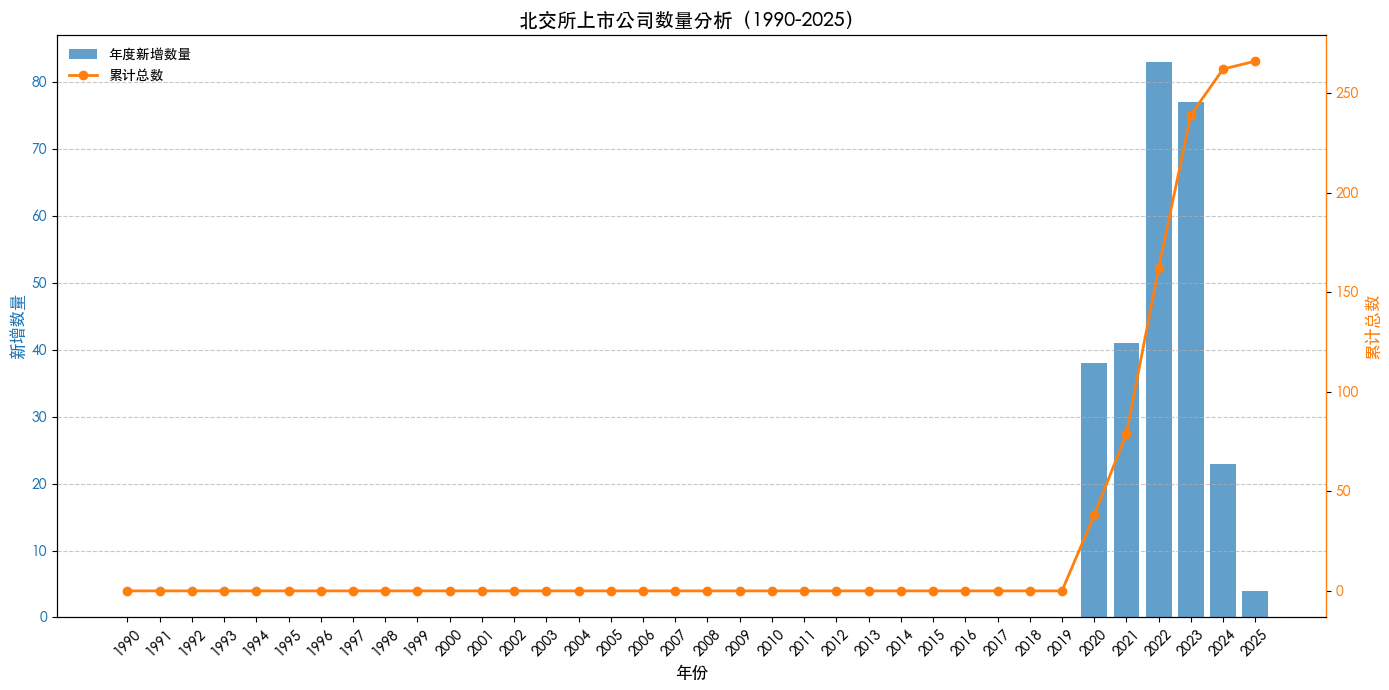

In [92]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

# 设置中文字体支持
plt.rcParams["font.family"] = ["Heiti TC"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 获取深圳A股列表（含上市日期）
bj_list.rename(columns={'上市日期': 'list_date'}, inplace=True)

# 转换日期格式并提取年份（处理中文日期格式如"1991年04月03日"）
bj_list['year'] = pd.to_datetime(
    bj_list['list_date'],
    errors='coerce'
).dt.year

# 过滤无效年份
bj_list = bj_list.dropna(subset=['year']).astype({'year': int})

# 统计各年度新增上市公司数量
annual_counts = bj_list.groupby('year').size().reset_index(name='新增数量')
print(f"北交所各年度新增上市公司数量:\n{annual_counts}")

# 填充缺失年份（确保1990-2025连续）
full_years = pd.DataFrame({'year': range(1990, 2026)})
annual_counts = full_years.merge(annual_counts, how='left').fillna(0).astype({'新增数量': int})

# 计算累计总数
annual_counts['累计总数'] = annual_counts['新增数量'].cumsum()

# 保存数据到CSV
annual_counts.to_csv("bj_annual_listings.csv", index=False)

# 创建画布和左Y轴
fig, ax1 = plt.subplots(figsize=(14, 7))

# 绘制左Y轴柱状图（年度新增数量）
bar = ax1.bar(
    x=annual_counts['year'],
    height=annual_counts['新增数量'],
    color='#1f77b4',
    alpha=0.7,
    label='年度新增数量'
)

# 设置左Y轴样式
ax1.set_title('北交所上市公司数量分析（1990-2025）', fontsize=14)
ax1.set_xlabel('年份', fontsize=12)
ax1.set_ylabel('新增数量', fontsize=12, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticks(annual_counts['year']) 
ax1.set_xticklabels(annual_counts['year'], rotation=45)

# 创建右Y轴
ax2 = ax1.twinx()

# 绘制右Y轴折线图（累计总数）
line, = ax2.plot(
    annual_counts['year'],
    annual_counts['累计总数'],
    color='#ff7f0e',
    marker='o',
    linewidth=2,
    markersize=6,
    label='累计总数'
)

# 设置右Y轴样式
ax2.set_ylabel('累计总数', fontsize=12, color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')
ax2.spines['right'].set_color('#ff7f0e')  # 设置右轴颜色与折线一致

# 合并图例（处理不同图表类型）
legend_handles = [
    Rectangle((0,0), 1, 1, facecolor='#1f77b4', alpha=0.7),
    Line2D([0], [0], color='#ff7f0e', marker='o', linewidth=2)
]
ax1.legend(
    handles=legend_handles,
    labels=['年度新增数量', '累计总数'],
    loc='upper left',
    fontsize=10,
    frameon=False
)

# 调整布局并显示
plt.tight_layout()
plt.show()

### 上交所的上市公司行业分布

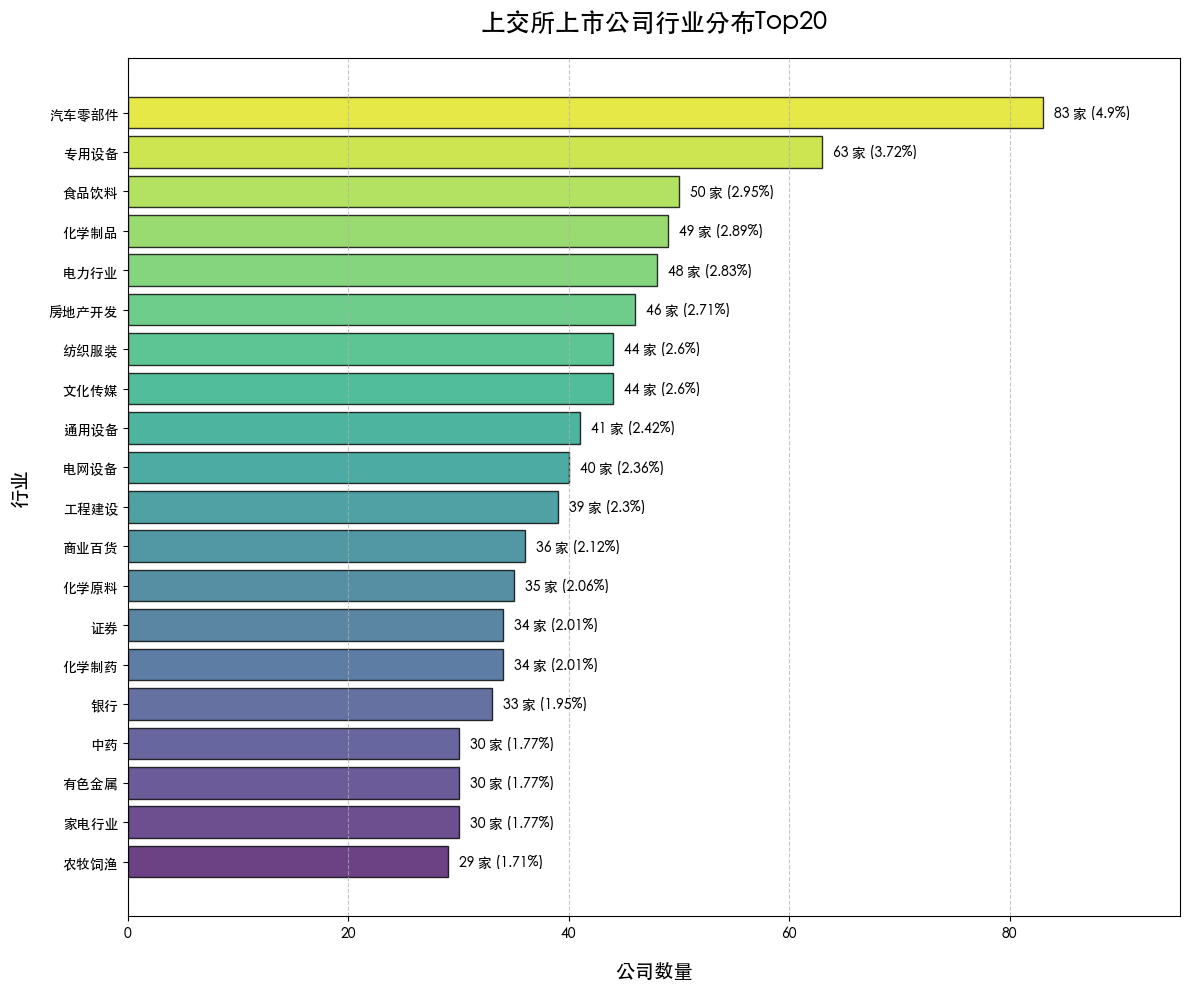

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 使用seaborn增强配色

# 解决中文显示问题
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

# 1. 数据读取
df = pd.read_csv('sh_list_with_industry.csv')

# 2. 数据统计：行业分布
industry_distribution = df['industry'].value_counts().reset_index()
industry_distribution.columns = ['行业', '公司数量']

# 3. 数据排序：按公司数量降序排列
industry_distribution = industry_distribution.sort_values(
    by='公司数量', 
    ascending=True,  # 升序排列，使最大的柱子在顶部
    ignore_index=True
)

# 计算占比（保留两位小数）
industry_distribution['占比(%)'] = round(
    industry_distribution['公司数量'] / industry_distribution['公司数量'].sum() * 100, 2
)

# 只显示公司数量排名前20的行业
top_industries = industry_distribution.tail(20)  # 由于是升序，取最后20个

# 5. 生成水平行业分布柱状图
plt.figure(figsize=(12, 10))  # 调整画布高度，适应更多行业名称

# 使用seaborn配色方案
colors = sns.color_palette('viridis', n_colors=20)

# 绘制水平柱状图
bars = plt.barh(
    y=top_industries['行业'], 
    width=top_industries['公司数量'],
    color=colors,
    edgecolor='black',  # 添加边框增强视觉效果
    alpha=0.8  # 设置透明度
)

# 添加数据标签（合并公司数量和占比）
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, i,  # X位置：柱子右侧 +1；Y位置：对应行
             f"{top_industries['公司数量'].iloc[i]} 家 ({top_industries['占比(%)'].iloc[i]}%)",
             ha='left', va='center', fontsize=10)

# 图表美化设置
plt.title('上交所上市公司行业分布Top20', fontsize=18, pad=20)
plt.xlabel('公司数量', fontsize=14, labelpad=15)
plt.ylabel('行业', fontsize=14, labelpad=15)

# 调整X轴范围，增加右侧空间
plt.xlim(0, top_industries['公司数量'].max() * 1.15)

# 添加网格线
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 优化布局
plt.tight_layout()

# 显示图表
plt.show()

### 上交所上市公司行业分布分析情况

### 深交所的上市公司行业分布分析
    - 针对当前最新的深交所上市公司列表进行行业分布分析

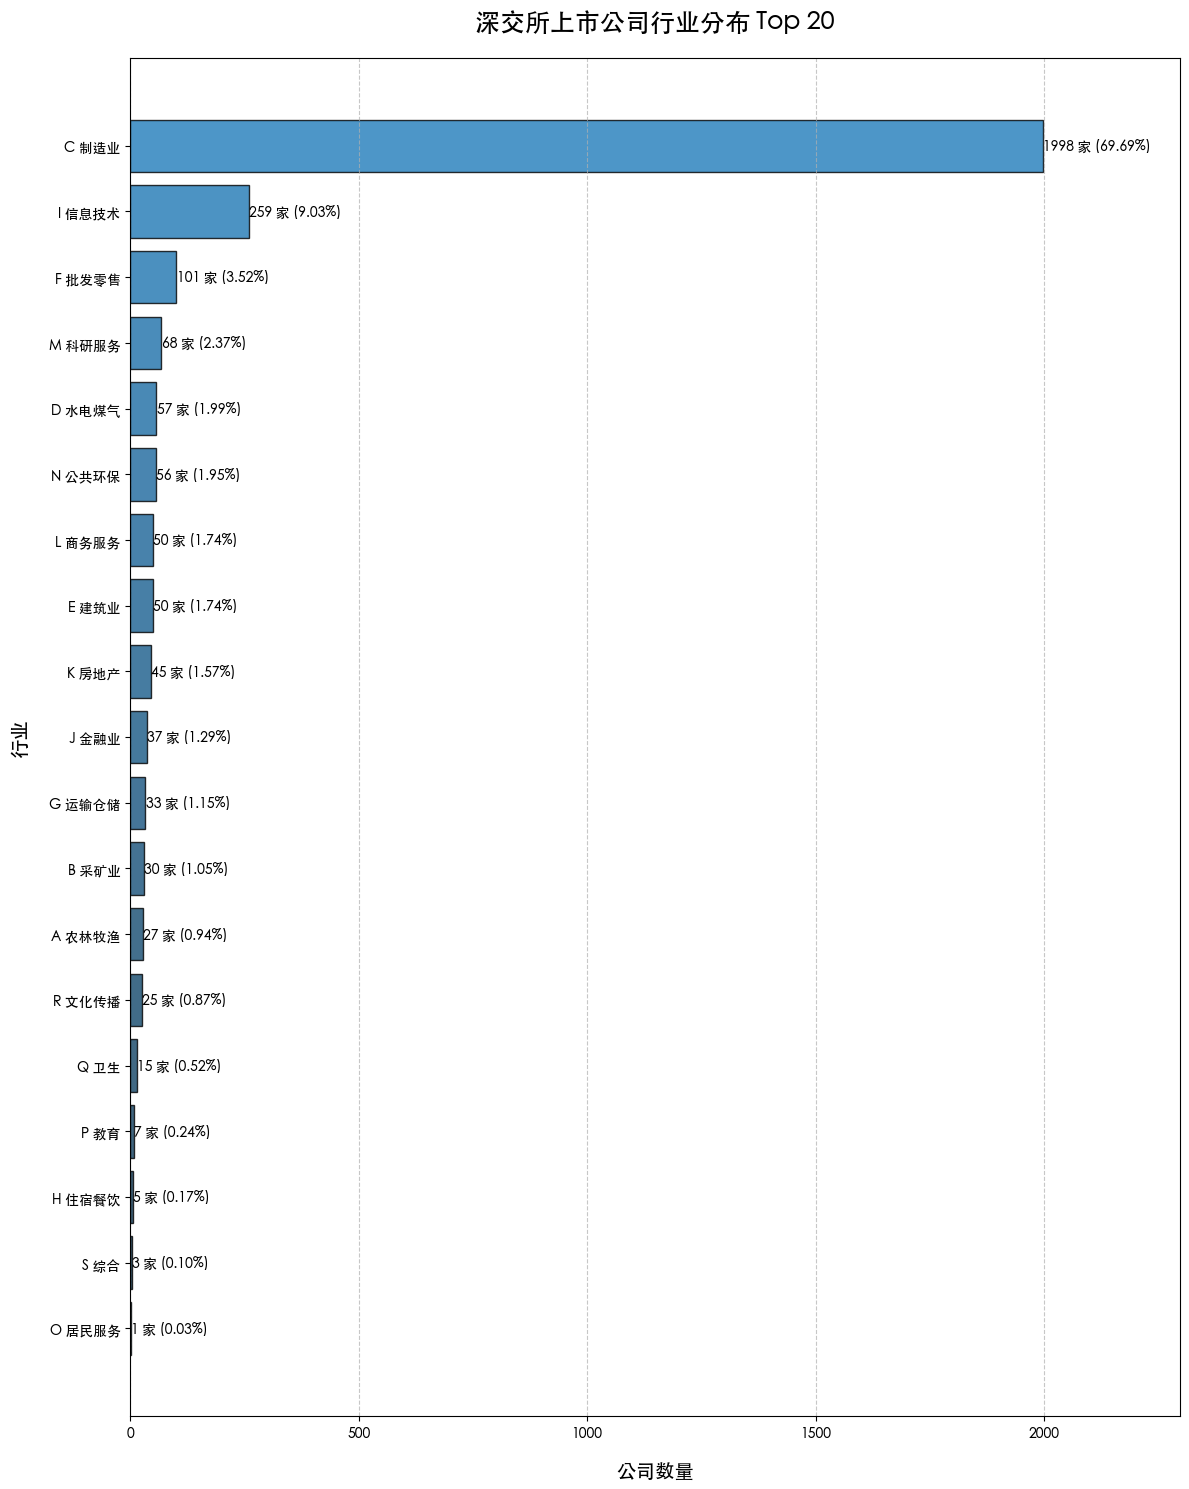

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# 解决中文显示问题
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

# 假设sz_list是已有的深交所上市公司列表，包含所属行业字段
sz_list = pd.read_csv('sz_list.csv')  # 若从文件读取，替换此路径

# 统计各行业的公司数量
industry_counts = sz_list['所属行业'].value_counts().reset_index()
industry_counts.columns = ['行业', '公司数量']

# 按公司数量降序排序
industry_counts = industry_counts.sort_values(by='公司数量', ascending=True)  # 升序排列，使最大的柱子在顶部

# 计算各行业公司数量的占比，保留两位小数
total_companies = industry_counts['公司数量'].sum()
industry_counts['占比(%)'] = round(industry_counts['公司数量'] / total_companies * 100, 2)

# 展示前30个行业的数据
top_30_industries = industry_counts.tail(20)  # 由于是升序排列，取最后20个

# 生成渐变色（由深到浅）
def create_gradient_colors(n, base_color='#1f77b4'):
    """生成从深到浅的渐变颜色列表"""
    lightness_values = np.linspace(0.3, 1.0, n)
    colors = []
    
    for value in lightness_values:
        rgb = mcolors.to_rgb(base_color)
        h, s, v = mcolors.rgb_to_hsv(rgb)
        v = value
        rgb = mcolors.hsv_to_rgb((h, s, v))
        colors.append(rgb)
    
    return colors

# 生成30个渐变色
colors = create_gradient_colors(30)

# 绘制水平柱状图
plt.figure(figsize=(12, 15))  # 增加高度以适应30个行业

bars = plt.barh(
    y=top_30_industries['行业'], 
    width=top_30_industries['公司数量'],
    color=colors,
    edgecolor='black',  # 添加边框增强视觉效果
    alpha=0.8  # 设置透明度
)

# 添加数据标签（公司数量和占比）
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(
        width + 0.5,  # X位置：柱子右侧加一点间距
        i,            # Y位置：对应行
        f"{top_30_industries['公司数量'].iloc[i]} 家 ({top_30_industries['占比(%)'].iloc[i]:.2f}%)",
        ha='left',    # 水平对齐方式
        va='center',  # 垂直对齐方式
        fontsize=10   # 字体大小
    )

# 设置图表标题和坐标轴标签
plt.title('深交所上市公司行业分布 Top 20', fontsize=18, pad=20)
plt.xlabel('公司数量', fontsize=14, labelpad=15)
plt.ylabel('行业', fontsize=14, labelpad=15)

# 调整X轴范围，增加右侧空间
plt.xlim(0, top_30_industries['公司数量'].max() * 1.15)

# 添加网格线
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 优化布局
plt.tight_layout()

# 显示图表
plt.show()

### 北交所上市公司行业分布分析

/var/folders/nm/0gctzqr569s00_67z2db27nm0000gn/T/ipykernel_23652/4119795385.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


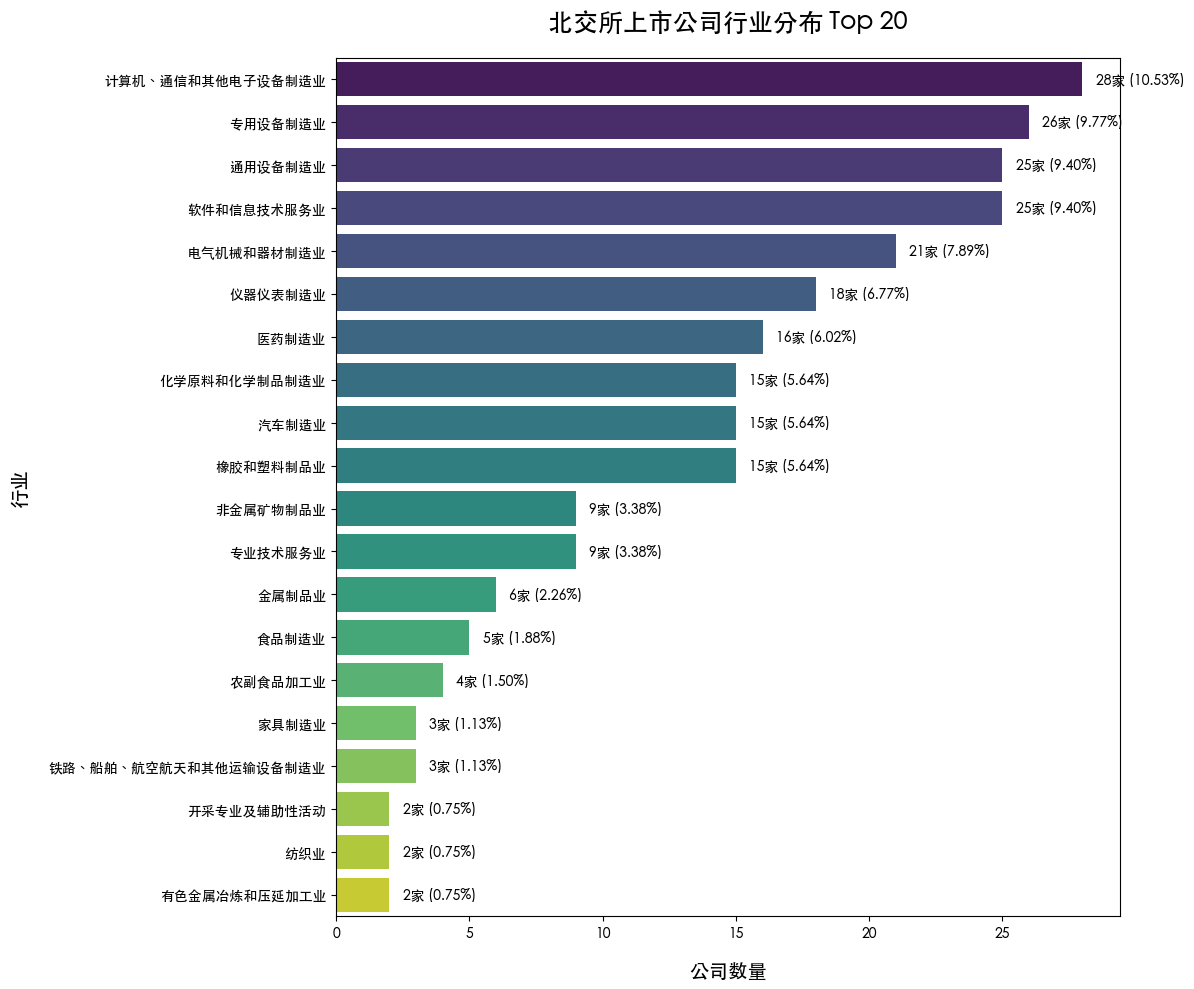

北交所上市公司行业分布 Top 30:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

# bj_list是已有的北交所上市公司列表，包含所属行业字段
bj_list = pd.read_csv('bj_list.csv')  # 若从文件读取，替换此路径

# 统计各行业的公司数量
industry_counts = bj_list['所属行业'].value_counts().reset_index()
industry_counts.columns = ['行业', '公司数量']

# 按公司数量降序排序
industry_counts = industry_counts.sort_values(by='公司数量', ascending=False)

# 计算各行业公司数量的占比，保留两位小数
total_companies = industry_counts['公司数量'].sum()
industry_counts['占比(%)'] = round(industry_counts['公司数量'] / total_companies * 100, 2)

# 展示前20个行业的数据（北交所公司数量较少，可选前20）
top_industries = industry_counts.head(20)

# 绘制水平柱状图（更适合展示行业分布）
plt.figure(figsize=(12, 10))
sns.barplot(
    y=top_industries['行业'],
    x=top_industries['公司数量'],
    palette='viridis'
)

# 添加数据标签（公司数量和占比）
for i, v in enumerate(top_industries['公司数量']):
    plt.text(v + 0.5, i, 
             f"{v}家 ({top_industries['占比(%)'].iloc[i]:.2f}%)", 
             ha='left', va='center', fontsize=10)

# 设置图表标题和坐标轴标签
plt.title('北交所上市公司行业分布 Top 20', fontsize=18, pad=20)
plt.xlabel('公司数量', fontsize=14, labelpad=15)
plt.ylabel('行业', fontsize=14, labelpad=15)

# 优化布局
plt.tight_layout()

# 显示图表
plt.show()